# Notebook 1: Download and Visualize the Raw Data

## 1.1 Introduction to the dataset and study area
This notebook introduces you to the data of interest. We analyse data from the broadband station SV13 of network X9, which was deployed during the KISS experiment (Klyuchevskoy volcanic group experiment) from 2015 to 2016. Station SV13 is located close to the summit of the Klyuchevskoy volcano on the Kamchatka Peninsula, Russia. During the tutorial we will analyse two days of seismic data recorded on the east component from the 4th of December 2015 to the 6th of December 2015. In this time window, volcanic tremors occur, indicating the activation of the plumbing system. We will use methods of unsupervised learning to explore the seismogram data and find groups of similar types of signals.

Interesting links and papers related to KISS experiment:
 - [GEOFON website](https://doi.org/10.14470/K47560642124)
 - [AGU EOS article about KISS; Shapiro et al., 2017](https://eos.org/science-updates/understanding-kamchatkas-extraordinary-volcano-cluster)
 - [Publication about Klyuchevskoy's transcrustal plumbing system; Journeau et al., 2020](https://www.science.org/doi/full/10.1126/sciadv.abj1571)
 - [Publication about unsupervised learning applied to KISS data; Steinmann et al., 2024](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023JB027167?af=R)

The image below shows the setup of the KISS experiment, taken from [AGU EOS article about KISS](https://eos.org/science-updates/understanding-kamchatkas-extraordinary-volcano-cluster).

<div>
<img src="../img/russian-volcano-seismology-project-setup.png" alt="Description" width="800"/>
</div>

## 1.2 Data download, preprocessing and visualization

We first setup a connection to the GFZ data server to download the data of interest. We then perform some preprocessing on the downloaded stream object.

In [1]:
# import necessary libraries
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Connect to the IRIS datacenter to collect waveforms from the datacenter
client = Client("GFZ")
stream = client.get_waveforms(
    network="X9",
    station="SV13",
    location="*",
    channel="HHE",
    starttime=UTCDateTime("2015-12-04T00:00"),
    endtime=UTCDateTime("2015-12-06T00:00"),
)

1 Trace(s) in Stream:
X9.SV13..HHE | 2015-12-04T00:00:00.000000Z - 2015-12-06T00:00:00.000000Z | 50.0 Hz, 8640001 samples


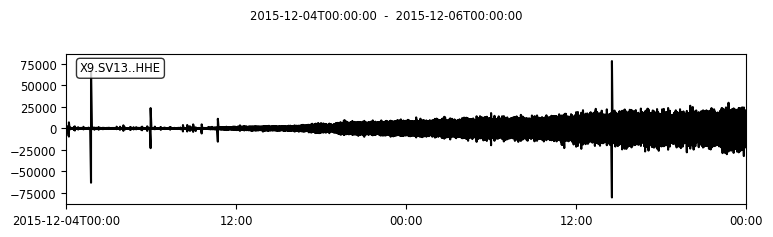

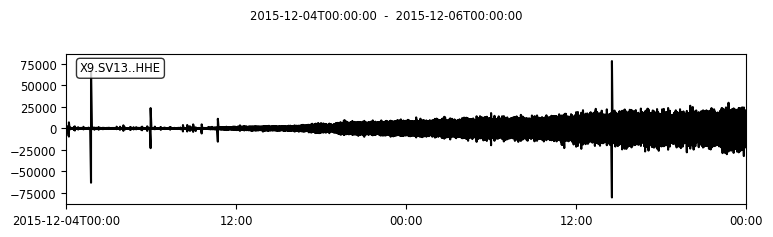

In [3]:
# preprocess the data
stream.merge(method=1)
stream.detrend("linear")
stream.filter(type="highpass", freq=1)

# plot the data and show information
print(stream)
stream.plot(rasterized=True)

In [4]:
# calculate the spectrogram
data = stream[0].data
dt = stream[0].stats.sampling_rate
nperseg = 4096
f, t, Sxx = spectrogram(data, fs=dt, nperseg=nperseg)

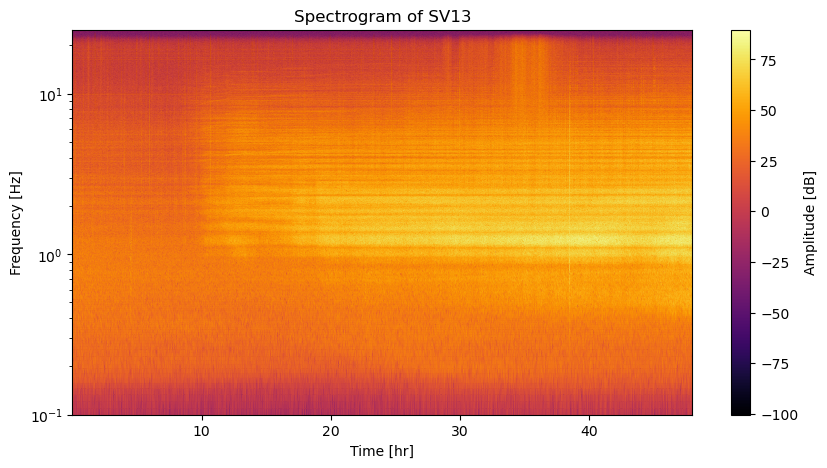

In [5]:
# show the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(t/3600, f, 10 * np.log10(Sxx), shading="gouraud", cmap='inferno')
plt.title("Spectrogram of SV13")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [hr]")
plt.yscale("log")
plt.ylim(0.1, 25)
plt.colorbar(label="Amplitude [dB]")

Before applying something fancy like unsupervised learning, it always makes sense to get an idea of the data by visualizing it (if possible). 

**What processes do you see in the time series or spectrogram representation? Do both representations show the same information? Why would you apply unsupervised learning here?**

## 1.3 Save the data

To work with the downloaded data in the following notebooks, we will save the stream object using the build-in obspy function `write`.

In [7]:
# save the stream data for the other notebooks
stream.write("../example/stream.mseed", format="MSEED")